# Introduction to Time-Series Analysis with Python
This notebook provides examples of Python code to illustrate key concepts in time-series analysis. 
Each section of code corresponds to topics covered in the lecture, and ample comments are provided 
to ensure that you understand each line of code.


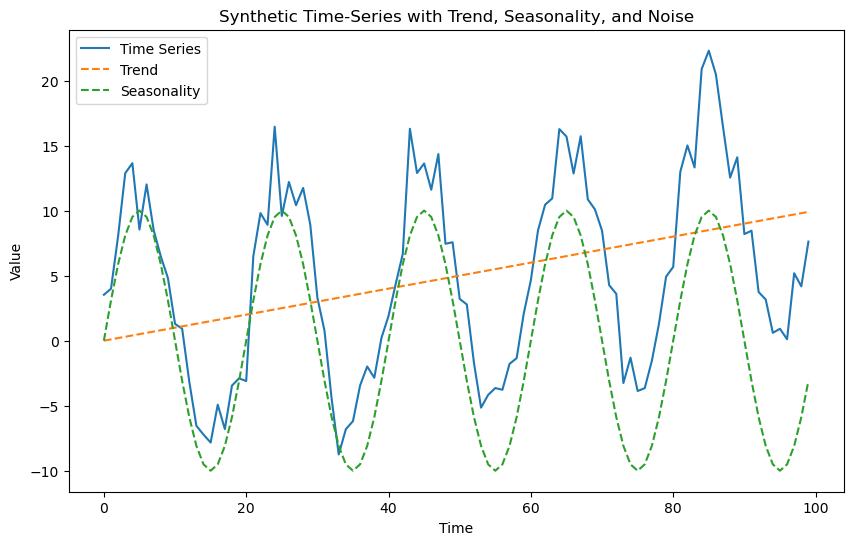

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Create a time index from 0 to 99
time = np.arange(100)

# Generate a linear trend
trend = 0.1 * time

# Generate a seasonal component with a period of 20
seasonal = 10 * np.sin(2 * np.pi * time / 20)

# Generate some random noise
noise = np.random.normal(scale=2, size=100)

# Combine these components to form the time series
series = trend + seasonal + noise

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time, series, label='Time Series')
plt.plot(time, trend, '--', label='Trend')
plt.plot(time, seasonal, '--', label='Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time-Series with Trend, Seasonality, and Noise')
plt.legend()
plt.show()


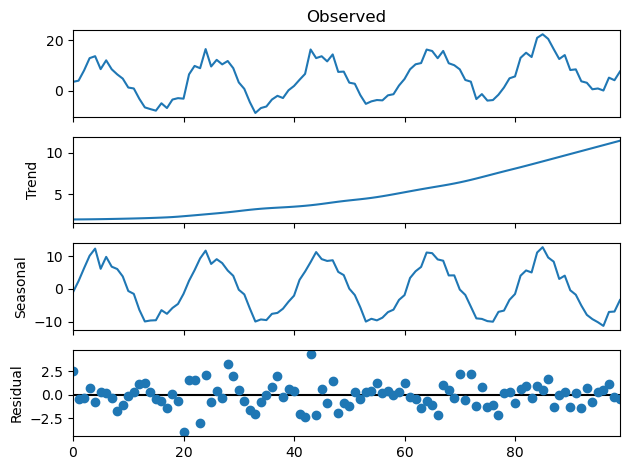

In [2]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition of the time series
stl = STL(series, period=20)
result = stl.fit()

# Plot the decomposed components
result.plot()
plt.show()

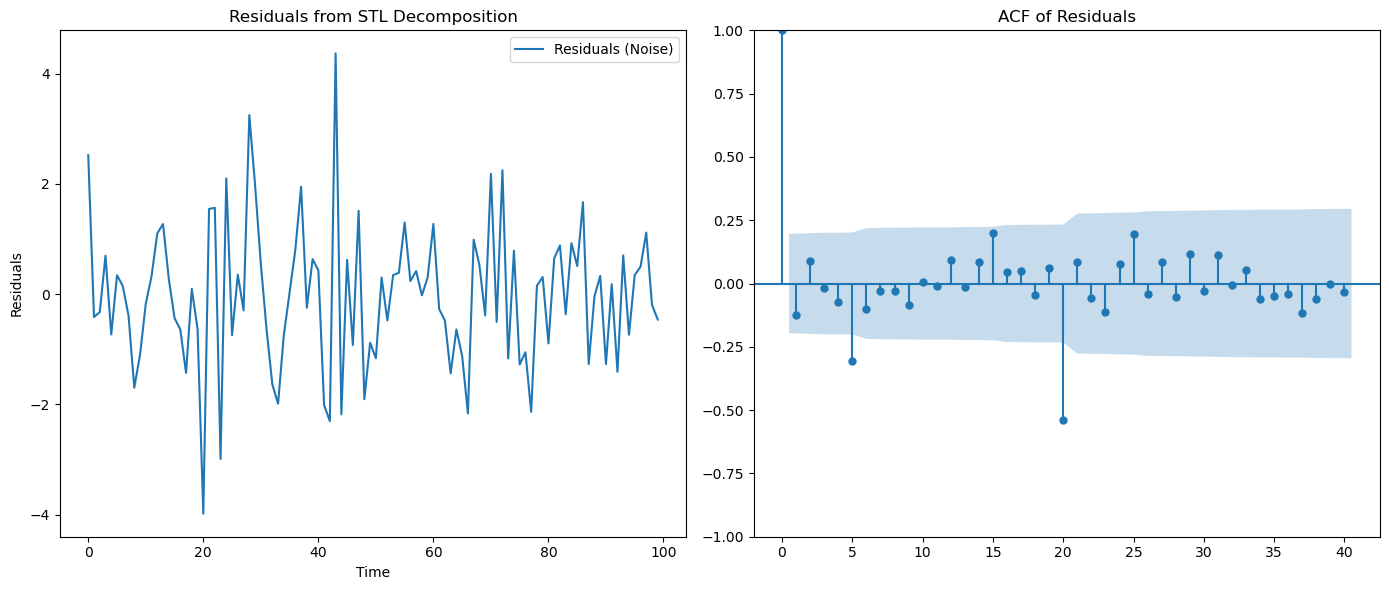

Ljung-Box test results:
      lb_stat  lb_pvalue
20  59.931232   0.000007


In [3]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import probplot

# Assuming 'series' is your time series data and the STL decomposition has already been performed
# Extract the residual (noise) component
residuals = result.resid

# Create a figure with 2 subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 1. Visual Inspection of Residuals
axs[0].plot(residuals, label='Residuals (Noise)')
axs[0].set_title('Residuals from STL Decomposition')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Residuals')
axs[0].legend()

# 2. Autocorrelation Function (ACF) Plot
plot_acf(residuals, lags=40, alpha=0.05, ax=axs[1])
axs[1].set_title('ACF of Residuals')

# Adjust layout to ensure no overlap
plt.tight_layout()
plt.show()

# 3. Statistical Tests: Ljung-Box test for autocorrelation
# Perform the Ljung-Box test on the residuals
ljung_box_results = acorr_ljungbox(residuals, lags=[20], return_df=True)

print("Ljung-Box test results:")
print(ljung_box_results)

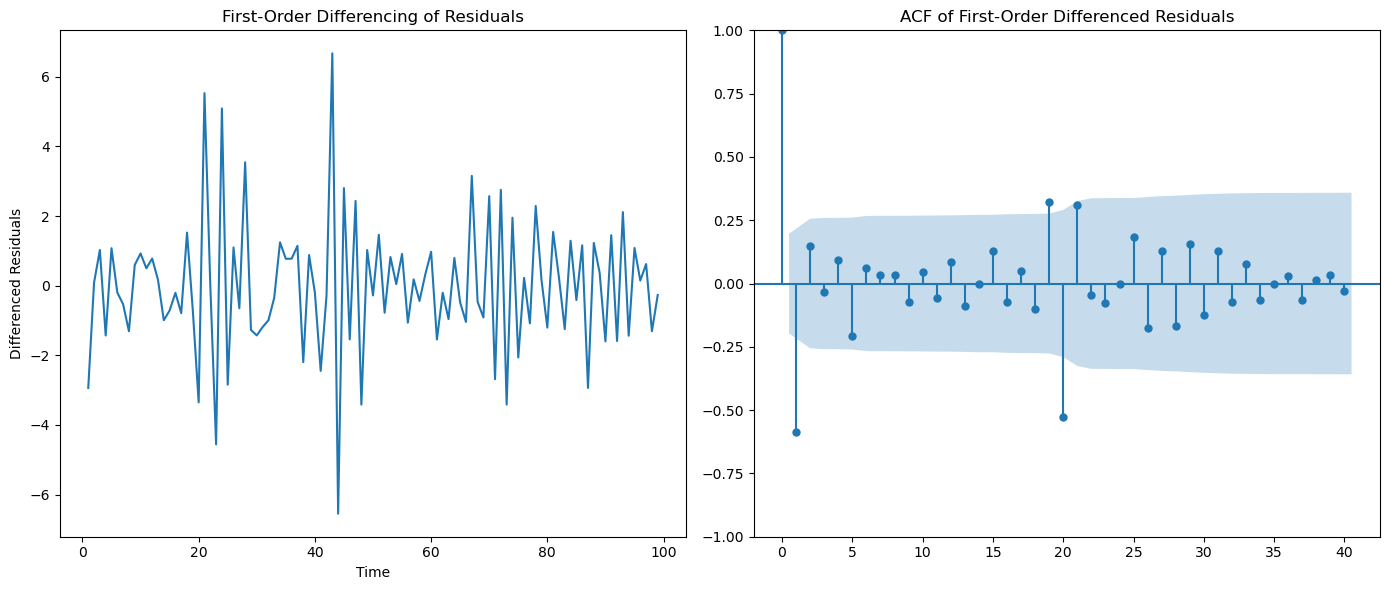

Ljung-Box test results for the differenced residuals:
      lb_stat     lb_pvalue
20  99.027321  1.879887e-12


In [4]:
# Assuming 'residuals' is readily available

# Create first-order difference of the residuals
diff_residuals = np.diff(residuals, n=1)

# Create time variable for the differenced series
time_diff = time[1:]  # Adjust time for differencing

# Plotting the first-order difference and its ACF
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first-order difference of the residuals
axs[0].plot(time_diff, diff_residuals)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Differenced Residuals')
axs[0].set_title('First-Order Differencing of Residuals')

# Plot the ACF of the first-order differenced residuals
plot_acf(diff_residuals, lags=40, ax=axs[1])
axs[1].set_title('ACF of First-Order Differenced Residuals')

plt.tight_layout()
plt.show()

# Perform and plot  the Ljung-Box test on the differenced residuals
ljung_box_results_diff = acorr_ljungbox(diff_residuals, lags=[20], return_df=True)
print("Ljung-Box test results for the differenced residuals:")
print(ljung_box_results_diff)